[torchvision 제공 이미지 전처리 관련 기능]
- torchvision.transforms 서브 모듈
    - 이미지 크기 조절
    - 이미지 정규화
    - 이미지 자르기
    - 이미지 회전 등
    - 이미지 데이터 타입: Pillow Image

---
[1] 모듈 로딩 및 데이터 설정

In [83]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


'DOSKEY'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [84]:
#모듈 로딩
import cv2                          # -> 이미지 데이터 ndarray
from PIL import Image               # -> 이미지 데이터 JpegImage
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms  #pytorch 지원 이미지 변환 관련 모듈
import torch

In [85]:
#데이터 관련 설정
img_path='../image/'
img_file=img_path+'three.png'    

---
[openCV & pillow]

In [86]:
cv_img=cv2.imread(img_file)
cv_img=cv2.cvtColor(cv_img,cv2.COLOR_BGR2RGB)   #BGR => RGB

pil_img=Image.open(img_file)

In [87]:
print(f'type(cv_img) : {type(cv_img)}')
print(f'type(pil_img) : {type(pil_img)}')

type(cv_img) : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.PngImagePlugin.PngImageFile'>


---
- 인스턴스와 메서드
    - 인스턴스(instance): 메모리(힙)에 존재하는(저장된) 데이터의 종류를 명시하여 부르는 용어
        - ex) 정수 인스턴스, vgg 인스턴스
    - 속성(attribute/field): 클래스가 가지는 특징(외형, 내형, 성격 등)
    - 메서드(method): 클래스가 가지는 기능, 역할 => 문법 구조는 함수와 동일 (def ~~~)

In [88]:
class a:
    #인스턴스를 생성해주는 메서드
    def __init__(self,num,loc):
        self.num=num    #인스턴스 속성
        self.loc=loc    #인스턴스 속성
        print('__init__()')

    #a클래스로 생성된 인스턴스 전용 메서드
    def test(self,food):
        print(self.loc,food)

In [89]:
#인스턴스 생성: a(10,'대구')
a1=a(10, '대구')

print(a1.loc)

__init__()
대구


In [90]:
a1.test('치맥')

대구 치맥


In [91]:
a2=a(100,'부산')

__init__()


In [92]:
a2=a(100,'부산')

a1+a2   #연산 기능 추가해줘야 함

__init__()


TypeError: unsupported operand type(s) for +: 'a' and 'a'

In [69]:
class a:
    #인스턴스를 생성해주는 메서드
    def __init__(self,num,loc):
        self.num=num    #인스턴스 속성
        self.loc=loc    #인스턴스 속성
        print('__init__()')

    #연산자 기능과 연결된 매직 메서드
    def __add__(self,other):
        print('__add__()')
        return self.num + other.num
    
    #인스턴스 변수명으로 호출되는 메서드
    def __call__(self, value):
        print('__call__()')

    #a클래스로 생성된 인스턴스 전용 메서드
    def test(self,food):
        print(self.loc,food)

In [71]:
a1=a(10, '대구')
a2=a(100,'부산')

__init__()
__init__()


In [72]:
a1+a2

__add__()


110

In [48]:
a(5,'경주')(8888)

__init__()
__call__()


---
- Resize: 이미지 크기 변경

In [78]:
#v2.Resize() 클래스
print(cv_img.shape)

imgTS=v2.ToImage()(cv_img)
imgTS2=v2.Resize(size=(100,100),interpolation=v2.InterpolationMode.BILINEAR)(imgTS)

print(imgTS2.shape)

(400, 400, 3)
torch.Size([3, 100, 100])


In [81]:
# v2.Compose() 클래스: 이미지에 진행할 여러가지 전처리를 하나로 묶음 처리(pipeline 설정)
print(cv_img.shape)

tras=v2.Compose(
    [
        v2.ToImage(),
        v2.Resize(size=(200,200),interpolation=v2.InterpolationMode.BILINEAR)
    ]
)
imgTS2=tras(cv_img)

print(imgTS2.shape)

(400, 400, 3)
torch.Size([3, 200, 200])


---
tensor -> ndarray

cv_np: (400, 400, 3), 3D


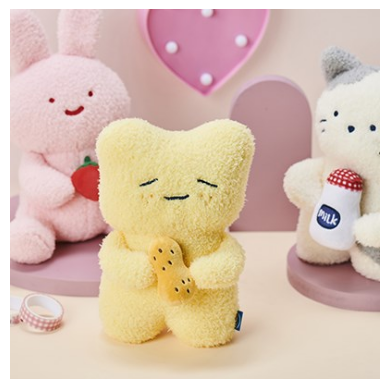

In [27]:
cv_np=cv_tensor1.numpy()
print(f'cv_np: {cv_np.shape}, {cv_np.ndim}D')

plt.imshow(cv_np)
plt.axis('off')
plt.show()

cv_np: (400, 400, 3), 3D


TypeError: Invalid shape (3, 400, 400) for image data

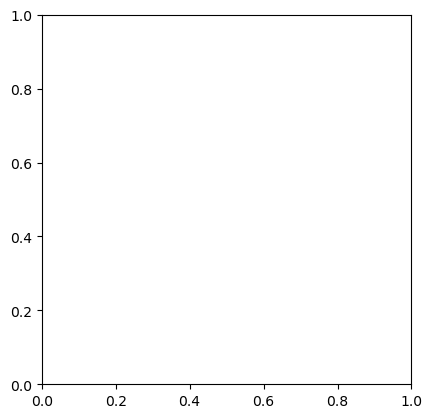

In [30]:
cv_np2=cv_tensor2.numpy()
print(f'cv_np: {cv_np.shape}, {cv_np.ndim}D')   # 채널이 젤 뒤에 가서 이건 ERROR

plt.imshow(cv_np2)
plt.axis('off')
plt.show()

In [36]:
from torchvision.transforms import v2

type(v2.ToImage()(cv_img))  #array를 넣으면 이미지 객체 반환

torchvision.tv_tensors._image.Image

In [37]:
v2.ToImage()(cv_img).shape

torch.Size([3, 400, 400])

---
tensor -> pil image

In [40]:
pil_img1=transforms.ToPILImage()(pil_tensor2)
print(f'pil img1: {pil_img1.width}, {pil_img1.height}, {pil_img1.mode}')
pil_img1.show()

pil img1: 400, 400, RGBA
